In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('careermitra_dataset.csv')

In [3]:
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [6]:
df['Suggested Job Role'].value_counts()

Suggested Job Role
Network Security Administrator               1112
Network Security Engineer                     630
Network Engineer                              621
Project Manager                               602
Database Administrator                        593
Portal Administrator                          593
Information Technology Manager                591
Software Engineer                             590
UX Designer                                   589
Design & UX                                   588
Software Developer                            587
CRM Business Analyst                          584
Business Systems Analyst                      582
Database Developer                            581
Solutions Architect                           578
Software Systems Engineer                     575
Software Quality Assurance (QA) / Testing     571
Web Developer                                 570
Database Manager                              570
CRM Technical Developer        

In [14]:
X = df.loc[:, ['Acedamic percentage in Operating Systems','Percentage in Communication skills','Percentage in Mathematics']]

In [15]:
y = df[['Suggested Job Role']]

In [16]:
X

,Acedamic percentage in Operating Systems,Percentage in Communication skills,Percentage in Mathematics
0,69,61,84
1,78,91,84
2,71,94,72
3,76,69,88
4,92,73,71
...,...,...,...
19995,83,69,84
19996,80,67,92
19997,83,88,94
19998,68,61,87


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = np.array(y_encoded, dtype=np.float32)

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
num_classes = len(np.unique(y_encoded))

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
df_X_train_scaled = pd.DataFrame(X_train_scaled)
print(df_X_train_scaled.head())  # Now it works

          0         1         2
0  0.196447 -0.584735 -0.488547
1  1.191221  0.405898  0.895878
2 -1.693625  0.901214 -1.081871
3 -1.693625 -0.881925  0.796991
4 -0.897806 -1.080051 -1.180759


In [31]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(3,)),  # Change 9 → 3
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
X_train_scaled.shape

(14000, 3)

In [35]:
history = model.fit(X_train_scaled, y_encoded, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0561 - loss: 3.5183 - val_accuracy: 0.0486 - val_loss: 3.5246
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0540 - loss: 3.5169 - val_accuracy: 0.0486 - val_loss: 3.5237
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0560 - loss: 3.5170 - val_accuracy: 0.0486 - val_loss: 3.5246
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0573 - loss: 3.5158 - val_accuracy: 0.0486 - val_loss: 3.5246
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0583 - loss: 3.5153 - val_accuracy: 0.0486 - val_loss: 3.5250
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0559 - loss: 3.5169 - val_accuracy: 0.0486 - val_loss: 3.5249
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0580 - loss: 3.5154 - val_accuracy: 0.0486 - val_loss: 3.5239
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0558 - loss: 3.5177 - val_accuracy: 0.

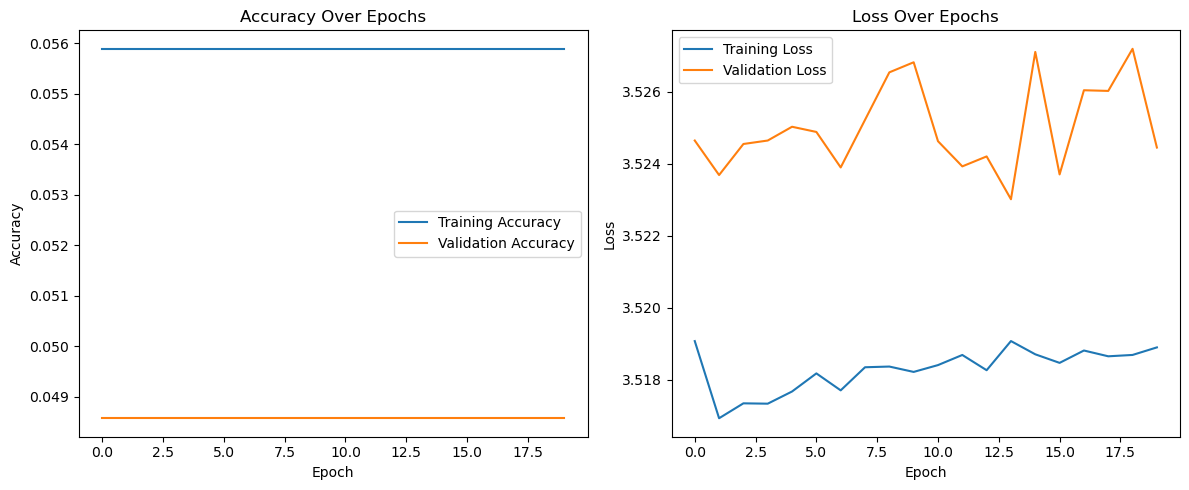

In [37]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
clf = MLPClassifier(activation='tanh', hidden_layer_sizes = (50,50,50), solver = 'adam') #, random_state=1)
clf.fit(X_train,y_train)
print("Training Accuracy Score: ",accuracy_score(clf.predict(X_train),y_train))
print("Testing Accuracy Score: ",accuracy_score(clf.predict(X_test),y_test))

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy Score:  0.05671428571428572
Testing Accuracy Score:  0.053
